In [10]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%run Imputation.ipynb

EmplType              float64
Certification           int64
InjuryMech            float64
High_impact_InjSev    float64
Amnesia_verb          float64
                       ...   
HospHead              float64
HospHeadPosCT           int64
Intub24Head           float64
Neurosurgery          float64
PosIntFinal           float64
Length: 124, dtype: object
EmplType              Int64
Certification         Int64
InjuryMech            Int64
High_impact_InjSev    Int64
Amnesia_verb          Int64
                      ...  
HospHead              Int64
HospHeadPosCT         Int64
Intub24Head           Int64
Neurosurgery          Int64
PosIntFinal           Int64
Length: 124, dtype: object
  Removing 50310 NaN values from 28 columns


In [11]:
pecarn_df.head()

,InjuryMech,High_impact_InjSev,Amnesia_verb,LOCSeparate,LocLen,Seiz,SeizOccur,SeizLen,HA_verb,HASeverity,...,OSIOth,CTSedAgitate,CTSedAge,CTSedRqst,CTSedOth,AgeinYears,Gender,Ethnicity,Race,PosIntFinal
PatNum,,,,,,,,,,,,,,,,,,,,,
1,11,2,0,0,92,0,92,92,1,1,...,92,92,92,92,92,16,1,2,2,0
2,8,2,0,0,92,0,92,92,0,92,...,92,92,92,92,92,5,2,2,1,0
3,5,2,0,0,92,0,92,92,0,92,...,92,92,92,92,92,14,1,2,1,0
4,6,1,91,0,92,0,92,92,91,92,...,92,92,92,92,92,1,2,2,2,0
5,12,2,91,0,92,0,92,92,91,92,...,92,92,92,92,92,1,1,2,2,0


In [17]:
# Feature Importance

61

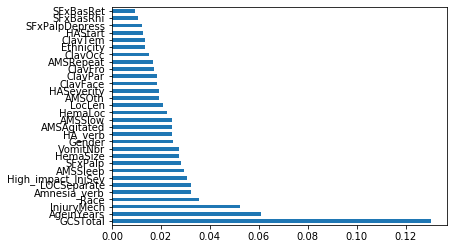

In [18]:
length_df = pecarn_df.shape[1] - 1
X = pecarn_df.iloc[:,0:length_df]  #independent columns
Y = pecarn_df.iloc[:,-1]    #target column
Y=Y.astype('int64')

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [5]:
features = pd.DataFrame(model.feature_importances_, columns=['Importance'], index=X.columns)
features['Feature'] = features.index
features.sort_values(by='Importance', ascending=False)

,Importance,Feature
GCSTotal,0.126825,GCSTotal
AgeinYears,0.068421,AgeinYears
InjuryMech,0.057052,InjuryMech
LOCSeparate,0.036345,LOCSeparate
SFxPalp,0.034937,SFxPalp
Amnesia_verb,0.034495,Amnesia_verb
High_impact_InjSev,0.031619,High_impact_InjSev
HemaSize,0.030449,HemaSize
AMSSleep,0.029805,AMSSleep
HA_verb,0.026561,HA_verb


In [6]:
selected_features = features[features.Importance > 0.01 ]
selected_features.sort_values(by='Importance', ascending=False)

,Importance,Feature
GCSTotal,0.126825,GCSTotal
AgeinYears,0.068421,AgeinYears
InjuryMech,0.057052,InjuryMech
LOCSeparate,0.036345,LOCSeparate
SFxPalp,0.034937,SFxPalp
Amnesia_verb,0.034495,Amnesia_verb
High_impact_InjSev,0.031619,High_impact_InjSev
HemaSize,0.030449,HemaSize
AMSSleep,0.029805,AMSSleep
HA_verb,0.026561,HA_verb
